**Analysis of air accidents**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv("/content/aviation-accidents.csv") # Import the DataFrame and first look
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


# Data Cleaning

In [3]:
clear_df = df.copy() #Create a copy of the dataframe
clear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [4]:
clear_df.isna().sum() # Check for null values

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

### "Date" Column

Isolate the column and clean the values

In [5]:
for i in df["date"].unique():
  if len(i) < 10: #10 is the number of characters in a date
    print(i)
  else: continue

date unk.


In [6]:
date_col= clear_df.loc[:,["date"]]
date_col

,date
0,date unk.
1,date unk.
2,date unk.
3,date unk.
4,date unk.
...,...
23962,11-MAY-2023
23963,11-MAY-2023
23964,12-MAY-2023
23965,14-MAY-2023


In [7]:
date_col = date_col[date_col["date"] != "date unk."] # remove the unkown values
date_col

,date
61,02-AUG-1919
62,11-AUG-1919
63,23-FEB-1920
64,25-FEB-1920
65,30-JUN-1920
...,...
23962,11-MAY-2023
23963,11-MAY-2023
23964,12-MAY-2023
23965,14-MAY-2023


Remove partial dates

In [8]:
not_valid_data = []

for i in date_col["date"]:
    try:
        datetime.strptime(i, "%d-%b-%Y")
    except ValueError:
        not_valid_data.append(i)

print("Not valid dates:", not_valid_data)

date_col = date_col[~date_col["date"].isin(not_valid_data)] # remove the partial dates from the column
date_col["date"] = pd.to_datetime(date_col["date"]) # convert dates from strings to datetime

Not valid data: ['??-???-1923', '??-DEC-1928', '??-FEB-1929', '??-OCT-1929', '??-???-1930', '??-???-1934', '??-MAY-1936', '??-???-1936', '??-MAR-1937', '??-MAR-1937', '??-NOV-1937', '??-FEB-1938', '??-MAR-1939', '??-MAR-1939', '??-APR-1939', '??-MAY-1939', '??-JUN-1940', '??-JUN-1940', '??-JUN-1940', '??-JUL-1940', '??-SEP-1940', '??-DEC-1940', '??-???-1940', '??-JUN-1941', '??-JUL-1941', '??-NOV-1941', '??-NOV-1941', '??-DEC-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-???-1941', '??-FEB-1942', '??-MAR-1942', '??-OCT-1942', '??-DEC-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-???-1942', '??-MAR-

<ipython-input-8-950976125849>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_col['date'] = pd.to_datetime(date_col['date']) # convert dates from strings to datetime
<ipython-input-8-950976125849>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_col['date'] = pd.to_datetime(date_col['date']) # convert dates from strings to datetime


In [9]:
date_col.info() # Check the type of the data

<class 'pandas.core.frame.DataFrame'>
Index: 23408 entries, 61 to 23966
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    23408 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 365.8 KB


### Fatalities operators

In [10]:
clear_df["fatalities"] = pd.to_numeric(df["fatalities"], errors="coerce") # convert the values to numbers, if this is not possible, transform them to null
# correct mistakes
clear_df["operator"] = clear_df["operator"].replace({"USAF": "USAAF"})
clear_df["operator"] = clear_df["operator"].replace({"RAF": "RAAF"})
clear_df["operator"] = clear_df["operator"].str.replace(r"[^a-zA-Z0-9]", "") # delete non-alphanumeric characters


Create a DataFrame to analyze the fatalities and the operators

In [11]:
fatal_op_df= clear_df.loc[:,["operator","fatalities"]]


In [12]:
fatal_op_df = fatal_op_df.dropna() # remove the null values
fatal_op_df["fatalities"]= fatal_op_df["fatalities"].astype(int) # convert float to int
fatal_op_df["fatalities"].info()

<class 'pandas.core.series.Series'>
Index: 19673 entries, 4 to 23966
Series name: fatalities
Non-Null Count  Dtype
--------------  -----
19673 non-null  int64
dtypes: int64(1)
memory usage: 307.4 KB


### 11 september 2002

Create a DataFrames to analyze changes before and after September 11, 2002

In [13]:
eleven_sept_df = clear_df.loc[:,["date","fatalities", "country","cat"]]
eleven_sept_df["date"] = date_col["date"]
eleven_sept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        23408 non-null  datetime64[ns]
 1   fatalities  19676 non-null  float64       
 2   country     23967 non-null  object        
 3   cat         23967 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 749.1+ KB


In [14]:
eleven_sept_after= eleven_sept_df[(eleven_sept_df["date"] > "2002-09-11")]
eleven_sept_before= eleven_sept_df[(eleven_sept_df["date"] < "2002-09-11")]


In [15]:
eleven_sept_82_02= eleven_sept_df[(eleven_sept_df["date"] > "1982-09-11") & (eleven_sept_df["date"] < "2002-09-11")]
eleven_sept_82_02

,date,fatalities,country,cat
14847,1982-09-13,50.0,Spain,A1
14848,1982-09-17,0.0,China,A1
14849,1982-09-17,0.0,USA,A2
14850,1982-09-18,5.0,Canada,A1
14851,1982-09-18,3.0,Luxembourg,A1
...,...,...,...,...
19644,2002-09-03,0.0,Indonesia,A1
19645,2002-09-04,0.0,Philippines,A1
19646,2002-09-07,0.0,Bahamas,O1
19647,2002-09-09,0.0,Seychelles,H2


In [16]:
eleven_sept_df_countries = eleven_sept_df[eleven_sept_df["country"] != "Unknown country"]


### Remove the null values

In [17]:
dropna_df= clear_df.loc[:,["registration","operator", "location"]]  # create a dataframe with columns that have null values that we will analyze individually

Isolate each column and remove null data

In [18]:
def clean_columns(df):
    for col in df.columns:
        col_name = col[:3] + "_col"
        dropna_column = df[col].dropna()
        globals()[col_name] = pd.DataFrame({col: dropna_column})
        print("New DataFrame created: " + col_name)

clean_columns(dropna_df)




New DataFrame created: reg_col
New DataFrame created: ope_col
New DataFrame created: loc_col


### Fatalities Type

Create a DataFrame to analyze the fatalities and the type

In [19]:
fatal_type_df= clear_df.loc[:,["type","fatalities"]]
fatal_type_df = fatal_type_df.dropna()
fatal_type_df["fatalities"]= fatal_type_df["fatalities"].astype(int)
fatal_type_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19676 entries, 4 to 23966
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        19676 non-null  object
 1   fatalities  19676 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 461.2+ KB


## Year Column

In [20]:
crashes_in_years = clear_df.loc[:,["year"]]
crashes_in_years.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    23967 non-null  object
dtypes: object(1)
memory usage: 187.4+ KB


In [21]:
crashes_in_years["year"].unique()

array(['unknown', '1919', '1920', '1921', '1922', '1923', '1924', '1925',
       '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933',
       '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941',
       '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949',
       '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957',
       '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'], dtype=object)

In [22]:
crashes_in_years["year"] =  pd.to_numeric(crashes_in_years["year"], errors="coerce")


In [23]:
crashes_in_years = crashes_in_years.dropna()
crashes_in_years["year"] = crashes_in_years["year"].astype(int)

In [24]:
crashes_in_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23906 entries, 61 to 23966
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    23906 non-null  int64
dtypes: int64(1)
memory usage: 373.5 KB


# Analysis

In [143]:
plt.style.use("ggplot")

### Countries with the least and most accidents

In [71]:
df["country"].unique() # Check countries


array(['Unknown country', 'Russia', 'Eritrea', 'Libya', 'Poland', '?',
       'India', 'Bulgaria', 'Bahamas', 'Zimbabwe', 'Mauritania', 'Cyprus',
       'Mexico', 'New Caledonia', 'Honduras', 'Peru', 'Kenya',
       'Antarctica', 'Latvia', 'Yemen', 'Ukraine', 'France', 'Liberia',
       'Italy', 'U.K.', 'South Africa', 'Sudan', 'Sweden', 'Cuba',
       'Belgium', 'China', 'Atlantic Ocean', 'Netherlands', 'Germany',
       'USA', 'Iran', 'Chile', 'Israel', 'Argentina', 'P.N. Guinea',
       'Nicaragua', 'Czech Rep.', 'Dominican Rep.', 'Brazil',
       'Mediterranean Sea', 'Indonesia', 'Egypt', 'Bolivia', 'Spain',
       'Australia', 'Iraq', 'Guatemala', 'Malta', 'Colombia',
       'Switzerland', 'Austria', 'Uganda', 'Trinidad & Tobago', 'Norway',
       'Greece', 'Algeria', 'Pakistan', 'Panama', 'Romania', 'Morocco',
       'Pacific Ocean', 'Hungary', 'Jamaica', 'Japan', 'Canada', 'Gambia',
       'Thailand', 'Philippines', 'Ecuador', 'Puerto Rico', 'Venezuela',
       'Mozambique', 'Si

In [26]:
df_countries = df[df["country"] != "Unknown country"] # Remove the unknown values

Count the countries with the least and most accidents

In [27]:
country_counts= df_countries["country"].value_counts()
top_countries = country_counts.sort_values(ascending=True)
worst_countries = country_counts.head(10)


In [28]:
n= 0
for i in country_counts.values:
  if i == 1:
    n +=1
  else: continue

print("Number of countries with only one crash is:",n)

Number of countries with only one crash is: 13


In [138]:
top_countries = top_countries.head(13)
print( "Countries with only one plane crash:\n",top_countries)

Countries with only one plane crash:
 country
Macau             1
Eswatini          1
Burundi           1
Kosovo            1
Guinea-Bissau     1
French Guiana     1
Monaco            1
Tuvalu            1
Tonga             1
Mauritius         1
Cook Isl.         1
Reunion           1
Christmas Isl.    1
Name: count, dtype: int64


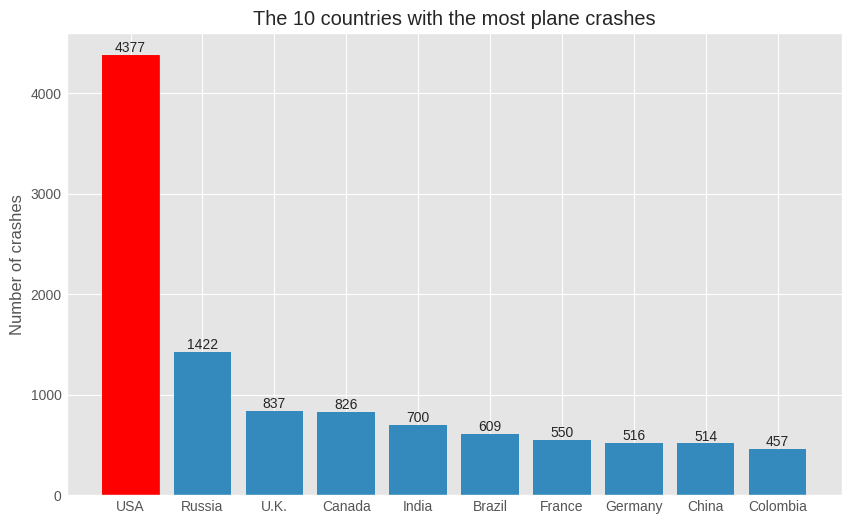

In [144]:
plt.bar(worst_countries.index, worst_countries.values)
plt.rcParams["figure.figsize"] = [10,6]

plt.ylabel("Number of crashes")
plt.title("The 10 countries with the most plane crashes")

for i, count in enumerate(worst_countries.values):
    plt.text(i, count, str(count), ha="center", va="bottom")

first = plt.bar(worst_countries.index, worst_countries.values)
first[0].set_color("red")

plt.show()

### Accidents in weekdays

In [31]:
date_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23408 entries, 61 to 23966
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    23408 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 881.8 KB


In [74]:
import calendar

date_col["weekday"] = date_col["date"].dt.weekday # Create a colmumn with a number representing a day
date_col["weekday"] = date_col["weekday"].apply(lambda x: calendar.day_name[x]) # Replace the number with the name of the day

days_counts= date_col["weekday"].value_counts()
days_counts

<ipython-input-74-01f8de88f3d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_col["weekday"] = date_col["date"].dt.weekday # Create a colmumn with a number representing a day
<ipython-input-74-01f8de88f3d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_col["weekday"] = date_col["weekday"].apply(lambda x: calendar.day_name[x]) # Replace the number with the name of the day


weekday
Friday       3701
Thursday     3516
Wednesday    3491
Tuesday      3444
Monday       3317
Saturday     3186
Sunday       2753
Name: count, dtype: int64

In [75]:
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Sunday", "Saturday"] # To order the weekdays
days_counts = days_counts.reindex(ordered_days)

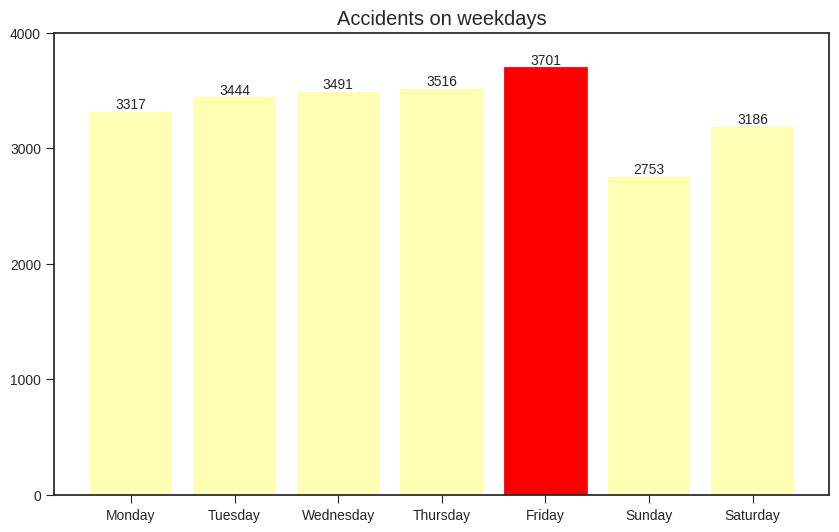

In [139]:
plt.bar(days_counts.index,days_counts.values)

plt.title("Accidents on weekdays")

for i, count in enumerate(days_counts.values):
    plt.text(i, count, str(count), ha="center", va="bottom")

first_day = plt.bar(days_counts.index, days_counts.values)
first_day[4].set_color("red")

plt.yticks(range(0,4500,1000))
plt.show()

## Accidents in months

In [35]:
date_col["mounth"] = date_col["date"].dt.strftime("%B") # Create a colmumn with the months

months_counts= date_col["mounth"].value_counts()


ordered_months = ["January", "February", "March", "April", "May","June", "July", "August", "September","October", "November", "December" ] # order the weekdays
months_counts = months_counts.reindex(ordered_months)

months_counts

<ipython-input-35-b2917a982553>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_col['mounth'] = date_col['date'].dt.strftime('%B') # Create a colmumn with the months


mounth
January      2086
February     1736
March        2075
April        1875
May          2020
June         1889
July         1971
August       1914
September    2074
October      1809
November     1889
December     2070
Name: count, dtype: int64

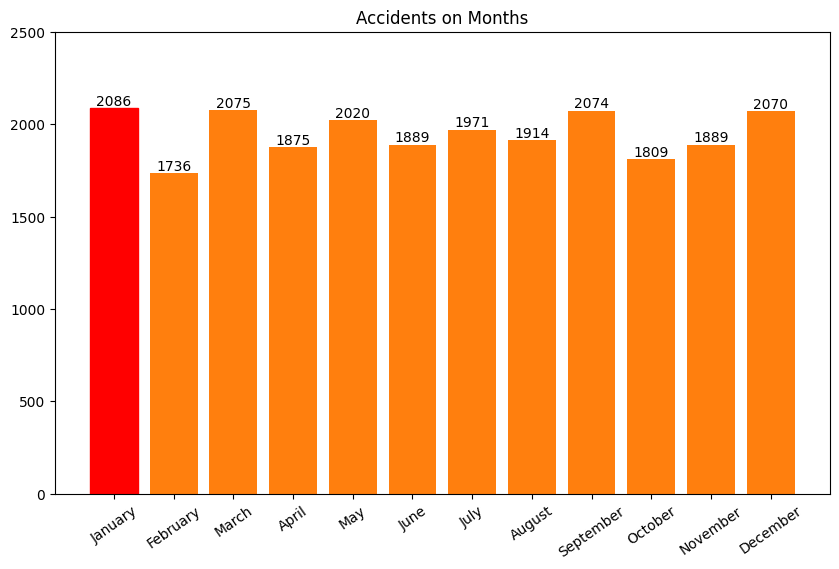

In [36]:
plt.bar(months_counts.index,months_counts.values)

plt.title("Accidents on Months")

for i, count in enumerate(months_counts.values):
    plt.text(i, count, str(count), ha="center", va="bottom")

first_month = plt.bar(months_counts.index, months_counts.values)
first_month[0].set_color("red")

plt.yticks(range(0,3000,500))
plt.xticks(rotation=35)

plt.show()

## Operators

To find the 10 operators with the most fatalities

In [78]:
fatal_op = fatal_op_df.groupby("operator")["fatalities"].sum()
fatal_op= fatal_op.sort_values(ascending = False)
fatal_op_ten = fatal_op.head(10)

Find the 10 operators with zero fatalities

In [79]:
safe_op_ten = fatal_op.sort_values(ascending = True)

In [84]:
n= 0
for i in safe_op_ten:
  if i == 0:
    n +=1
  else: continue

print("The number of operators who caused zero fatalities is:", n)


The number of operators who caused zero fatalities is: 2953


In [82]:
zero_fatal_op = safe_op_ten.head(2948)

Count operator accidents

In [83]:
ope_col["operator"] = ope_col[ope_col["operator"] != "Unknown"]
operator_counts= ope_col["operator"].value_counts()
operator_counts.sort_values()

operator
Wings Over Africa                        1
Amazonese                                1
Aerotechnia                              1
Viking Int. Air Freight                  1
Ansett Airlines of PNG, op.for TAA       1
                                      ... 
private                                299
German AF                              517
US Navy                                745
RAAF                                  1050
USAAF                                 3724
Name: count, Length: 6014, dtype: int64

Operators with only one accident

In [42]:
n= 0
for i in operator_counts:
  if i == 1:
    n +=1
  else: continue

print("The number of operators with only one crash:", n)

one_crash_op = operator_counts.sort_values().head(n)


The number of operators with only one crash: 4063


Operators with the most accidents and fatalities

In [43]:
worst_operator = operator_counts.sort_values(ascending=False).head(10)
worst_operator

operator
USAAF                3724
RAAF                 1050
US Navy               745
German AF             517
private               299
Aeroflot              198
Soviet AF             142
Air France            138
American Airlines     116
French AF             113
Name: count, dtype: int64

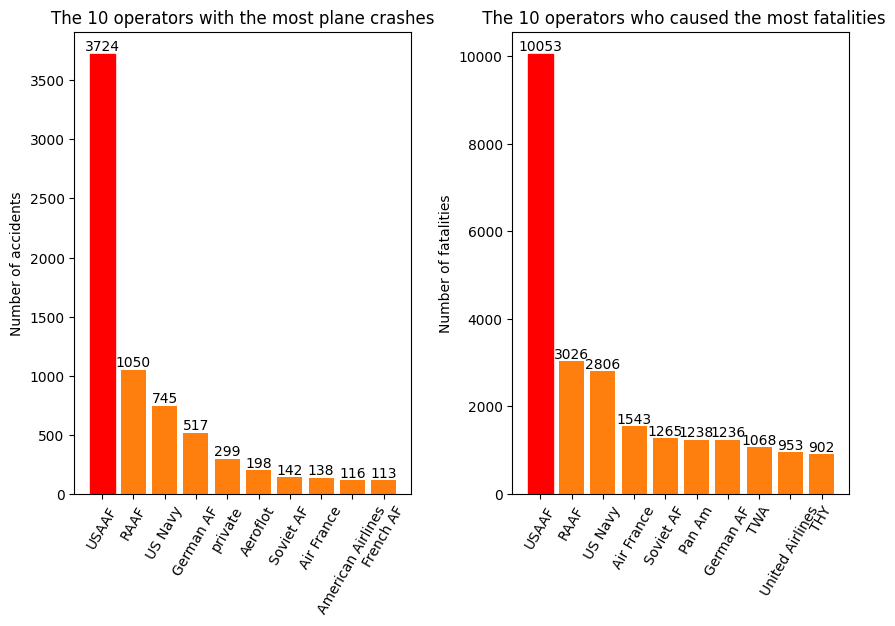

<Figure size 2000x500 with 0 Axes>

In [98]:
# First subplot
plt.subplot(1,2,1)
plt.bar(worst_operator.index, worst_operator.values)

plt.ylabel("Number of accidents")
plt.title("The 10 operators with the most plane crashes")
plt.xticks(rotation=60)

for i, count in enumerate(worst_operator.values):
    plt.text(i, count, str(count), ha="center", va="bottom")

worst_op = plt.bar(worst_operator.index, worst_operator.values)
worst_op[0].set_color("Red")

# Second subplot
plt.subplot(1,2,2)
plt.bar(fatal_op_ten.index, fatal_op_ten.values)

plt.ylabel("Number of fatalities")
plt.title(" The 10 operators who caused the most fatalities")
plt.xticks(rotation=60)

for i, count in enumerate(fatal_op_ten.values):
    plt.text(i, count, str(count), ha="center", va="bottom")

top_fatal = plt.bar(fatal_op_ten.index, fatal_op_ten.values)
top_fatal[0].set_color("Red")

# layout and visualization
plt.subplots_adjust(wspace=0.3) # Distance between the two plot
plt.figure(figsize=(20, 5))
plt.tight_layout()
plt.show()


Operators with zero fatalities and only one accident

In [ ]:
safe_op = list(one_crash_op.index[one_crash_op.index.isin(zero_fatal_op.index)])

print("list of the operators who caused zero fatalities and only one crash: ")

for i in safe_op:
  print("-",i)

## Aircrafts

In [99]:
fatal_type = fatal_type_df.groupby("type")["fatalities"].sum()

#Aircrafts with the most fatalities
fatal_type= fatal_type.sort_values(ascending = False)
fatal_type_ten= fatal_type.head(10)


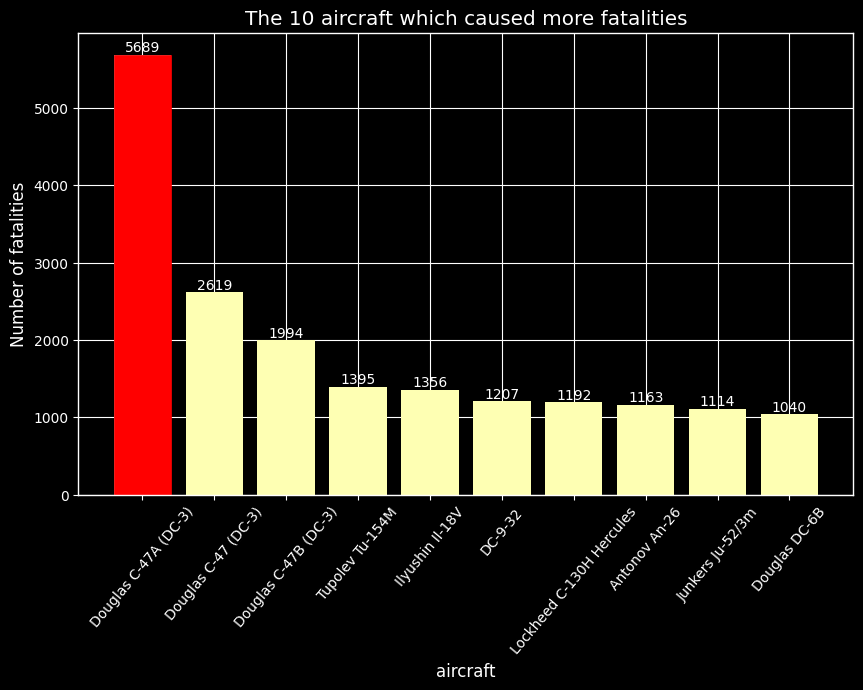

In [134]:
plt.bar(fatal_type_ten.index, fatal_type_ten.values)

plt.xlabel("aircraft")
plt.ylabel("Number of fatalities")
plt.title("The 10 aircraft which caused more fatalities")
plt.xticks(rotation=50)

for i, count in enumerate(fatal_type_ten.values):
    plt.text(i, count, str(count), ha="center", va="bottom")

top_fatal_type = plt.bar(fatal_type_ten.index, fatal_type_ten.values)
top_fatal_type[0].set_color("Red")

plt.show()

## Category Fatalities

In [125]:
clear_df["cat"].unique() # Check categories

array(['U1', 'A1', 'A2', 'O1', 'H2', 'C1', 'C2', 'H1', 'O2', 'I2', 'I1'],
      dtype=object)

**Wich air accidents category caused more fatalities**

In [126]:
cat_fatal = clear_df.groupby("cat")["fatalities"].sum()
cat_fatal

cat
A1    110908.0
A2       135.0
C1      8699.0
C2        52.0
H1       746.0
H2       176.0
I1         0.0
I2         0.0
O1        11.0
O2         2.0
U1         0.0
Name: fatalities, dtype: float64

## After 11 september 2002

**Number of accidents before and after 11 september 2002**

In [48]:
crashes_82_2002 = eleven_sept_82_02["date"].value_counts().sum()
crashes_after2002 = eleven_sept_after["date"].value_counts().sum()
print(f" In the 20 years before 2002 there were {crashes_82_2002} air disasters, while in the following 20 years, until 2023, there were some {crashes_after2002}, therefore {crashes_82_2002 - crashes_after2002 } fewer accidents")

 In the 20 years before 2002 there were 4649 air disasters, while in the following 20 years, until 2023, there were some 4275, therefore 374 fewer accidents


**Accidents for countries before and after 2002**

In [107]:
country_counts2002= eleven_sept_df_countries["country"].value_counts()
top_countries2002 = country_counts2002.sort_values(ascending=True)
worst_countries2002 = country_counts2002.head(10)

In [112]:
country_counts_82_02 = eleven_sept_82_02["country"].value_counts()
worst_countries82_02 = country_counts_82_02.head(10)

In [109]:
worst_countries82_02

country
USA          911
Russia       361
Canada       209
Brazil       129
Colombia     122
Indonesia    122
Angola        92
Mexico        89
U.K.          88
France        83
Name: count, dtype: int64

In [110]:
country_counts_after_2002 = eleven_sept_after["country"].value_counts()
top_countries_after_2002 = country_counts_after_2002.sort_values(ascending=True)
worst_countries_after_2002 = country_counts_after_2002.head(10)

In [111]:
worst_countries_after_2002

country
USA           996
Canada        234
Russia        214
Indonesia     135
Venezuela     115
Brazil        110
D.R. Congo    109
Mexico        105
U.K.           93
Colombia       78
Name: count, dtype: int64

The USA remains the country with the most plane crashes

**Fatalities by country**

In [113]:
countries_fatal_after2002 = eleven_sept_after.loc[:,["country", "fatalities"]]
countries_fatal_after2002 = countries_fatal_after2002.groupby("country")["fatalities"].sum()
countries_fatal_after2002 = countries_fatal_after2002.sort_values(ascending= False)

In [114]:
countries_fatal_after2002.head(10)

country
Russia       1314.0
Iran          991.0
Indonesia     908.0
USA           633.0
Ukraine       582.0
Algeria       444.0
Pakistan      410.0
Egypt         392.0
Nigeria       380.0
Venezuela     379.0
Name: fatalities, dtype: float64

In [115]:
countries_fatal_after2002.mean()

72.35751295336787

In [116]:
countries_fatal_82_02 = eleven_sept_82_02.loc[:,["country", "fatalities"]]
countries_fatal_82_02 = countries_fatal_82_02.groupby("country")["fatalities"].sum()
countries_fatal_82_02 = countries_fatal_82_02.sort_values(ascending= False)

In [117]:
countries_fatal_82_02.head(10)


country
USA               2499.0
Russia            1923.0
Colombia          1266.0
China             1081.0
Iran               935.0
Atlantic Ocean     894.0
India              871.0
Indonesia          859.0
Japan              844.0
Angola             825.0
Name: fatalities, dtype: float64

In [118]:
countries_fatal_82_02.mean()

152.57286432160805

The USA has lost its lead in fatalities, and in general there are much fewer fatalities in plane crashes; but this last data can be influenced by technological progress.

# Cartogramma

<ipython-input-145-f65a48073838>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


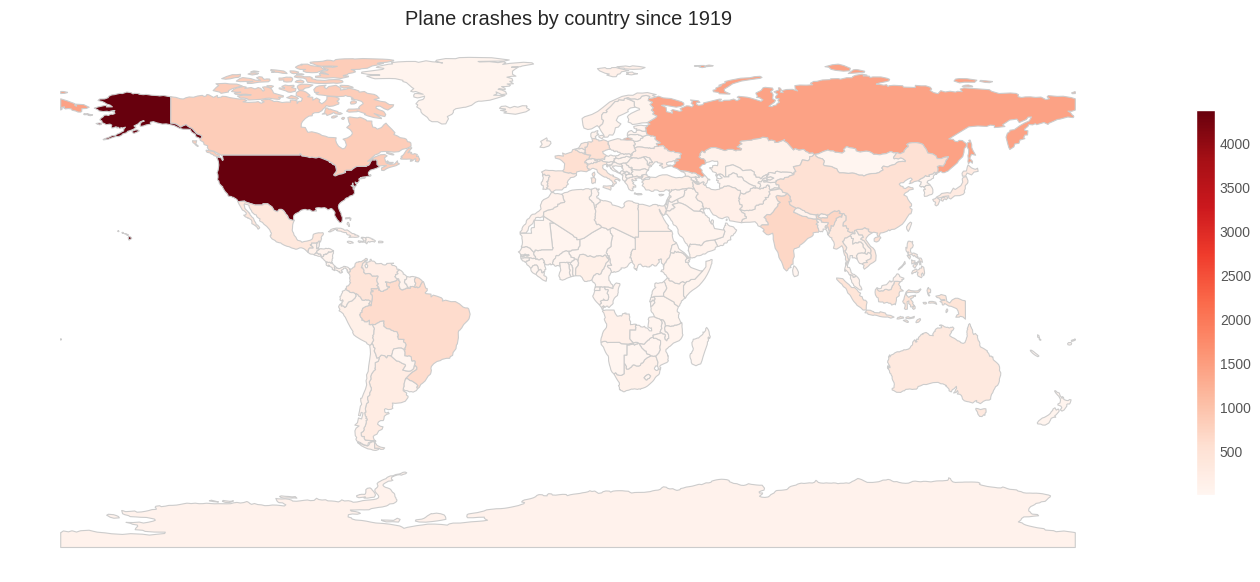

In [145]:
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Upload a dataset containing country borders
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Calculate the number of accidents by country
countries_counts = df_countries["country"].value_counts()
countries_counts = countries_counts.rename(index={"USA": "United States of America"})

# Join world boundaries data based on "name" column
world = world.merge(countries_counts, how="left", left_on="name", right_index=True)

# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Normalize data to legend color
norm = Normalize(vmin=world["count"].min(), vmax=world["count"].max())
mapper = ScalarMappable(norm=norm, cmap="Reds")

# Plot the countries borders with colors based on number of accidents
world.plot(column="count", cmap="Reds", linewidth=0.8, ax=ax, edgecolor="0.8", legend=False, norm=norm)

# Add a colored bar as a legend
cbar = fig.colorbar(mapper, ax=ax, shrink=0.5)


ax.set_title("Plane crashes by country since 1919")
ax.axis("off")

plt.show()